In [11]:
%load_ext lab_black

import os
import io
import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt

from google.oauth2 import service_account
from datetime import datetime

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# BigQuery Access Configuration

In [12]:
key_path = "./key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)
pandas_gbq.context.credentials = credentials
pandas_gbq.context.project = "project-id"

In [ ]:
sql = "SELECT * FROM `project-id.dataset_A`"
b3_df = pandas_gbq.read_gbq(sql)
sql = "SELECT * FROM `project-id.dataset_B`"
b4_df = pandas_gbq.read_gbq(sql)
sql = "SELECT * FROM `project-id.dataset_C`"
a5_df = pandas_gbq.read_gbq(sql)

In [ ]:
a5_df.columns

In [31]:
a5_df.columns = [
    #...
]

# 0. Custom Data Wrangling Functions

In [73]:
def info_to_dataframe(in_df:pd.DataFrame) -> pd.DataFrame:
    buffer = io.StringIO()
    in_df.info(buf=buffer)
    s = buffer.getvalue()
    target = s.split("\n")[5:-3]

    dd_series = []
    name_series = []
    dtype_series = []
    
    for row in target:
        tmp = row.split()
        dd_series.append(tmp[0])
        name_series.append(tmp[1])
        dtype_series.append(tmp[-1])

    return pd.DataFrame(list(zip(dd_series, name_series, dtype_series)), columns=["dd", "colName", "dtype"])

def dt_convert(val:str):
    value = str(val)
    return datetime.strptime(value[:25] + ' ' +value[29:], '%d-%b-%y %H.%M.%S.%f %p')

def extract_numeric_values(val:str) -> np.integer:
    if (str(val).isnumeric()):
        return np.int64(val)
    return -1
    
def extract_char_values(val:str) -> str:
    if(str(val).isnumeric()):
        return "numerical"
    return str(val)
    
def extract_register_values(val:str):
    if(len(str(val)) == 10):
        ap = [letter for letter in str(val)]
        if (not "".join(ap[:2]).isnumeric() and "".join(ap[2:]).isnumeric()):
            return val
    return "not a register"

def extract_foreign_register_values(val:str):
    if(len(str(val)) == 10) and (val == extract_register_values(val)):
        return "citizen register"
    return val

def convert_str_to_int(val:str):
    try:
        tmp = float(val)
        return np.int64(tmp)
    except:
        return -1

def extract_date(val:str):
    try:
        return datetime.strptime(str(val), "%Y.%m.%d")
    except:
        return pd.NaT

# 1. Tender Official Data Wrangling

In [7]:
sql = "SELECT * FROM `project-id.dataset_D`"
bidder_df = pandas_gbq.read_gbq(sql)

Downloading: 100%|██████████| 172427/172427 [00:54<00:00, 3166.84rows/s]


In [8]:
sql = "SELECT * FROM `project-id.dataset_F`"
invitation_df = pandas_gbq.read_gbq(sql)

Downloading: 100%|██████████| 72809/72809 [00:26<00:00, 2748.76rows/s]


## Tender Invitation data type conversion

In [9]:
invitation_df["..."] = invitation_df["..."].astype(np.int64)
invitation_df["..."] = invitation_df["..."].apply(lambda x : dt_convert(x))
invitation_df["..."] = invitation_df["..."].apply(lambda x : dt_convert(x))
invitation_df["..."] = invitation_df["..."].apply(lambda x : str(x).lower())
invitation_df["..."] = invitation_df["..."].apply(lambda x : str(x).lower())
invitation_df["..."] = invitation_df["..."].apply(lambda x : dt_convert(x))
invitation_df["..."] = invitation_df["..."].astype(np.int64)
invitation_df["..."] = invitation_df["..."].astype(np.int8)
invitation_df["..."] = invitation_df["..."].apply(lambda x : np.int64(x))

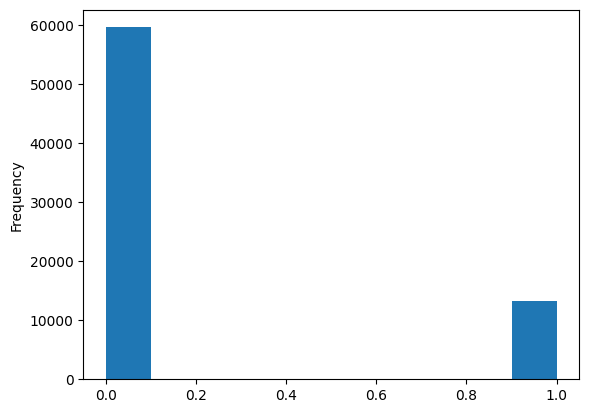

In [10]:
invitation_df["..."].astype(np.int8).plot.hist()
plt.show()

In [11]:
invitation_df.columns = [val.lower() for val in invitation_df.columns]

In [12]:
invitation_df.head(2)

invitation_id   tender_code tender_name   invitation_number  is_package  \
0  1555659040439  LT/201905001        TEST  LT/201905001/01/01         1.0   
1  1555659105714  LT/201905002       TEST0  LT/201905002/01/01         0.0   

   tender_year  total_budget  year_budget  \
0         2019           0.0          0.0   
1         2019           0.0          0.0   

                  budget_governor_name budget_entity_name tender_type_code  \
0  ТЕСТИЙН ТӨСВИЙН ЕРӨНХИЙЛӨН ЗАХИРАГЧ    lhagva.testtttt              job   
1  ТЕСТИЙН ТӨСВИЙН ЕРӨНХИЙЛӨН ЗАХИРАГЧ    lhagva.testtttt              job   

  tender_type_name    fund_name                             rule_name  \
0             ажил  Улсын төсөв  Нээлттэй тендер шалгаруулалтын журам   
1             ажил  Улсын төсөв    Тендер шалгаруулалтын онцгой журам   

   is_simple_electronic        publish_date        receive_date  \
0                     1 2019-05-09 12:00:00 2019-12-17 10:00:00   
1                     1 2019-11-28 12:00:00 2019-12-05 10:00:00   

            open_date           doc_status_name  
0 2019-12-17 10:10:00                      Шинэ  
1 2019-12-05 10:30:00  Тендер хүлээн авч байгаа

## Bidder datatype conversion

In [ ]:
bidder_df.columns

In [ ]:
bidder_df.info()

In [ ]:
info_to_dataframe(bidder_df)

In [ ]:
bidder_df[bidder_df["..."].apply(lambda x : not str(x).isnumeric())]["..."].unique()

In [16]:
bidder_df["..."] = bidder_df["..."]
bidder_df["..."] = bidder_df["..."].apply(lambda x : extract_numeric_values(x))
bidder_df["..."] = bidder_df["..."].apply(lambda x : extract_char_values(x))

lower_col_vals = [var.lower() for var in bidder_df.columns]
bidder_df.columns = lower_col_vals

In [17]:
bidder_df["..."].describe()

count    1.724270e+05
mean     6.541220e+13
std      7.652600e+15
min      0.000000e+00
25%      2.385929e+06
50%      4.064267e+06
75%      5.466466e+06
max      9.136110e+17
Name: supplier_register_numerical, dtype: float64

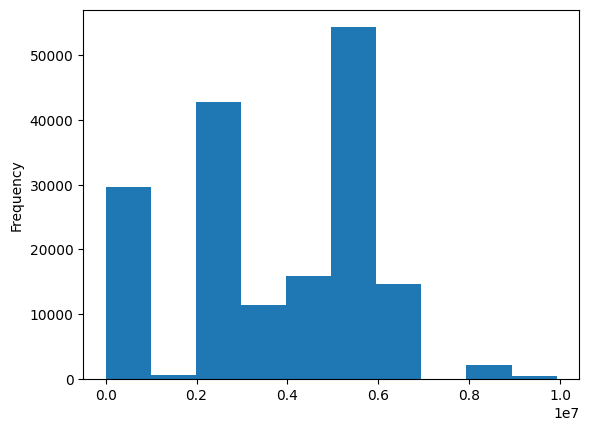

In [18]:
bidder_df[bidder_df["..."] < 10000000]["..."].plot.hist()
plt.show()

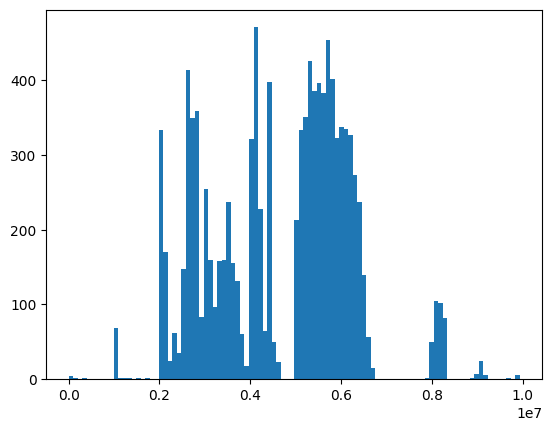

In [19]:
uniq_vals = bidder_df[bidder_df["..."] < 10000000]["..."].sort_values().unique()
plt.hist(uniq_vals, bins = 100)
plt.show()

In [20]:
bidder_df["..."] = bidder_df["..."].apply(lambda x : extract_register_values(x))
bidder_df["..."] = bidder_df["..."].apply(lambda x : extract_foreign_register_values(x))
bidder_df = bidder_df.drop(columns="...")

In [ ]:
bidder_df.columns

In [ ]:
bidder_df.info()

In [ ]:
info_to_dataframe(bidder_df)

In [ ]:
pandas_gbq.to_gbq(bidder_df, "...", project_id="...", if_exists='fail')  #replace
pandas_gbq.to_gbq(invitation_df, "...", project_id="...", if_exists='fail')  #replace

# 2. ... Data Wrangling

In [27]:
sql = "SELECT * FROM `...`"
company_main_bq = pandas_gbq.read_gbq(sql)
sql = "SELECT * FROM `...`"
shareholder_bq = pandas_gbq.read_gbq(sql)
sql = "SELECT * FROM `...`"
industry_bq = pandas_gbq.read_gbq(sql)
sql = "SELECT * FROM `...`"
udirdlaga_bq = pandas_gbq.read_gbq(sql)

Downloading: 100%|██████████| 255235/255235 [00:23<00:00, 10798.24rows/s]


In [107]:
col_vals = [str(val).lower() for val in xx_df.columns]
xx_df.columns = col_vals

In [108]:
xx_df.columns

Index(['org_names', 'rank', 'last_name', 'first_name', 'assigned_date', 'year',
       'owner_total', 'family_total', 'count_apartment_building',
       'count_house_building', 'count_cottage_building',
       'count_fence_house_building', 'count_service_building',
       'count_industrial_building', 'count_office_building',
       'count_farm_building', 'count_home_building', 'count_parking_building',
       'count_auto_parking_building', 'count_other_building',
       'total_construction_value', 'transports', 'transport_total_value',
       'animals', 'animal_total_value', 'lands', 'land_total_value',
       'total_treasure_value', 'savings_total', 'savings_mon_total',
       'savings_other_total', 'receivable_total', 'licenses',
       'license_total_value', 'stock_owner_name', 'stock_count',
       'stock_total_value', 'lenders', 'loan_total_value', 'name',
       'position_name', 'rocivilservice', 'deal'],
      dtype='object')